<a href="https://colab.research.google.com/github/Diksha-Bora/Data-Science-project/blob/main/Linear_Regression_Boston_Housing4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [44]:
data = pd.read_csv("/content/BostonHousing.csv")
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [45]:
data.columns = data.columns.str.upper()
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [46]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

<Axes: >

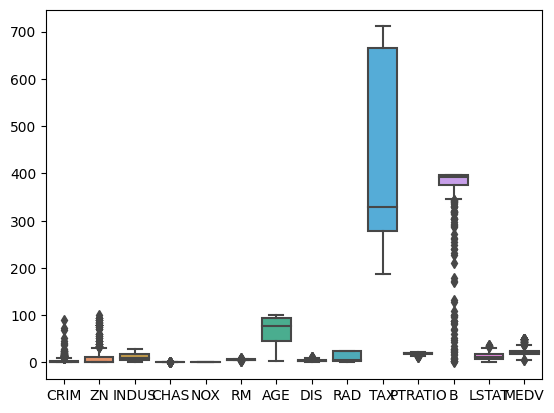

In [47]:
sns.boxplot(data = data)

<Figure size 1000x600 with 0 Axes>

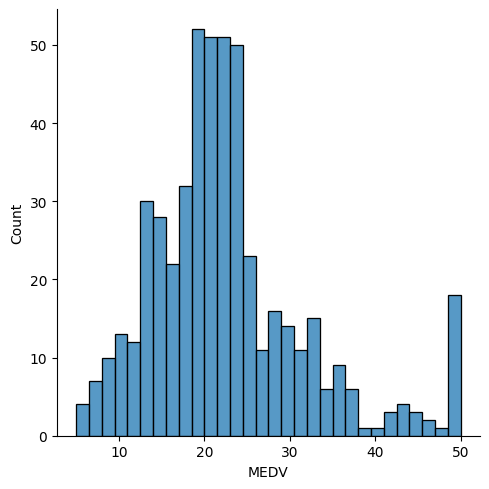

In [48]:
plt.figure(figsize = [10, 6])

sns.displot(data['MEDV'],bins=30)
plt.show()

In [49]:
input = data.drop('MEDV',axis=1)
output = data['MEDV']

In [50]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(input,output)

LinearRegression()

In [51]:
y_pred = lin_reg.predict(input)

In [52]:
print("The coefficient are :",lin_reg.coef_)
print("The intercept is :",lin_reg.intercept_)

The coefficient are : [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
The intercept is : 36.459488385089955


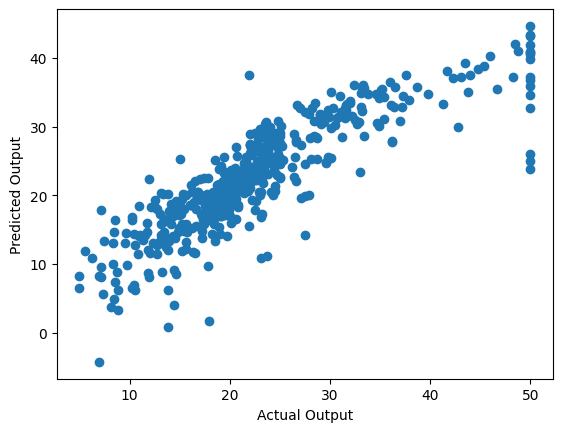

In [53]:
plt.scatter(output,y_pred)
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.show()

In [54]:
# Model Evaluation 
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score
print("The mean_absolute_error of model is : ",mean_absolute_error(output,y_pred))
print("The mean_absolute_percentage_error of model is : ",mean_absolute_percentage_error(output,y_pred))
print("The mean_squared_error of model is : ",mean_squared_error(output,y_pred))
print("The r2_score of model is : ",r2_score(output,y_pred))

The mean_absolute_error of model is :  3.270862810900316
The mean_absolute_percentage_error of model is :  0.16417298806489974
The mean_squared_error of model is :  21.894831181729202
The r2_score of model is :  0.7406426641094095
